## Credit Risk Predictor

### 1) Problem statement
- The goal of this project, is to build a model to predict whether the person,described by the attributes of the dataset, is a good (1) or a bad (0) credit risk

### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/ml/datasets/South+German+Credit#
- The data consists of 21 columns and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the ASC Data as Pandas DataFrame

In [16]:
import pandas as pd
df = pd.read_csv("SouthGermanCredit.asc", sep=' ')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#### Show Top 5 Records

In [17]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#### Shape of the dataset

In [18]:
df.shape

(1000, 21)

### 2.2 Dataset information

The below list consists of a detailed breakdown of all the features in the Dataset. 'Kredit' is our target variable, the one whose value must be predicted.
P.S. The feature names are in German to preserve the authenticity of the data. In the dataset, they can be replaced using the DataDescription.csv file and the Pandas library.

    laufkont = status
    1 : no checking account
    2 : … < 0 DM 3 : 0<= … < 200 DM 4 : … >= 200 DM / salary for at least 1 year

    laufzeit = duration

    moral = credit_history
    0 : delay in paying off in the past
    1 : critical account/other credits elsewhere
    2 : no credits taken/all credits paid back duly
    3 : existing credits paid back duly till now
    4 : all credits at this bank paid back duly

    verw = purpose
    0 : others
    1 : car (new)
    2 : car (used)
    3 : furniture/equipment
    4 : radio/television
    5 : domestic appliances
    6 : repairs
    7 : education
    8 : vacation
    9 : retraining
    10 : business

    hoehe = amount

    sparkont = savings
    1 : unknown/no savings account
    2 : … < 100 DM 3 : 100 <= … < 500 DM 4 : 500 <= … < 1000 DM 5 : … >= 1000 DM

    beszeit = employment_duration
    1 : unemployed
    2 : < 1 yr 3 : 1 <= … < 4 yrs 4 : 4 <= … < 7 yrs 5 : >= 7 yrs

    rate = installment_rate
    1 : >= 35
    2 : 25 <= … < 35
    3 : 20 <= … < 25
    4 : < 20

    famges = personal_status_sex
    1 : male : divorced/separated
    2 : female : non-single or male : single
    3 : male : married/widowed
    4 : female : single

    buerge = other_debtors
    1 : none
    2 : co-applicant
    3 : guarantor

    wohnzeit = present_residence
    1 : < 1 yr 2 : 1 <= … < 4 yrs 3 : 4 <= … < 7 yrs 4 : >= 7 yrs

    verm = property
    1 : unknown / no property
    2 : car or other
    3 : building soc. savings agr./life insurance
    4 : real estate

    alter = age

    weitkred = other_installment_plans
    1 : bank
    2 : stores
    3 : none

    wohn = housing
    1 : for free
    2 : rent
    3 : own

    bishkred = number_credits
    1 : 1
    2 : 2-3
    3 : 4-5
    4 : >= 6

    beruf = job
    1 : unemployed/unskilled - non-resident
    2 : unskilled - resident
    3 : skilled employee/official
    4 : manager/self-empl./highly qualif. employee

    pers = people_liable
    1 : 3 or more
    2 : 0 to 2

    telef = telephone
    1 : no
    2 : yes (under customer name)

    gastarb = foreign_worker
    1 : yes
    2 : no

    kredit (target column) = credit_risk
    0 : bad
    1 : good                                                                                    

### 2.3 Renaming Columns

In [30]:
columns_names = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration","installment_rate", "personal_status_sex", "other_debtors", "present_residence", "property","age", "other_installment_plans", "housing", "number_credits", "job", "other_installment_plans", "telephone", "foreign_worker", "credit_risk" ]
df.columns = columns_names
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,other_installment_plans,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [31]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
other_installment_plans    0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [32]:
df.duplicated().sum()

0

### 3.3 Check data types

In [33]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

### 3.4 Checking the number of unique values of each column


In [34]:
df.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
other_installment_plans      2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

### 3.5 Check statistics of data set

In [35]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,other_installment_plans,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [37]:
# Checking target varibles counts for balance
df["credit_risk"].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

### 4 Visualizing Data

<AxesSubplot:>

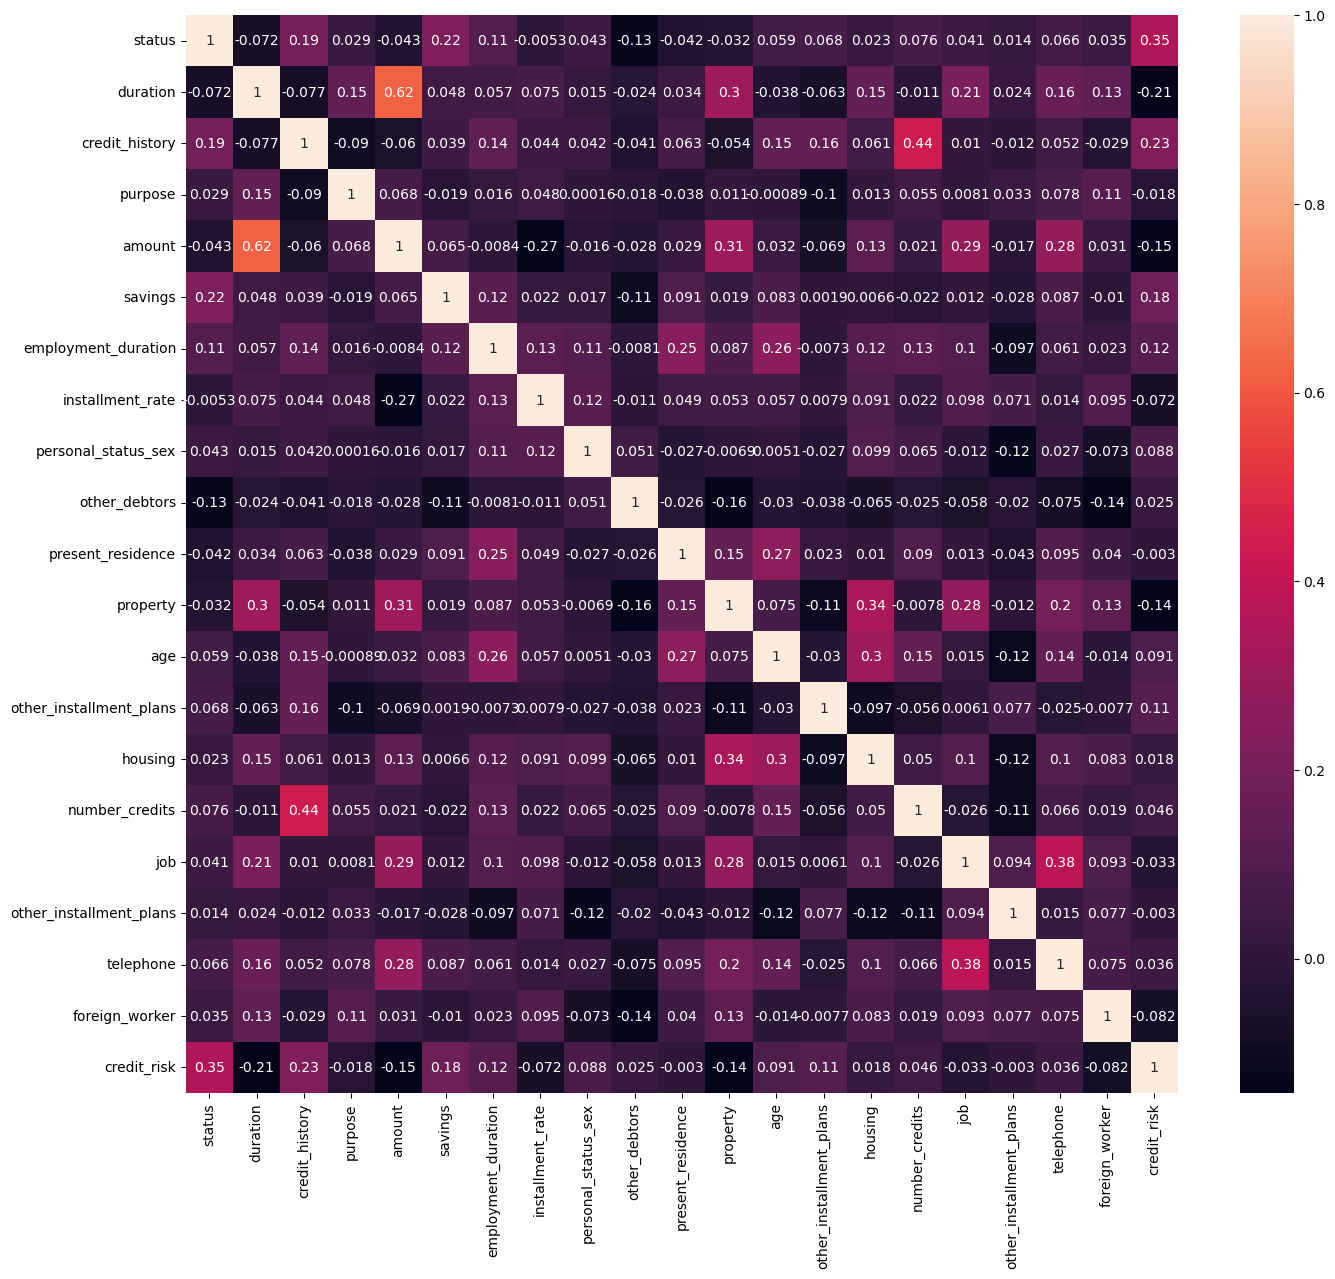

In [41]:
# checking feature correlation
plt.figure(figsize = (16, 14))
sns.heatmap(df.corr(), annot=True, robust=True)

> **Insights: Columns having least correlation with target column -**
> 1. present_residence
> 1. housing
> 1. other_installment_plans

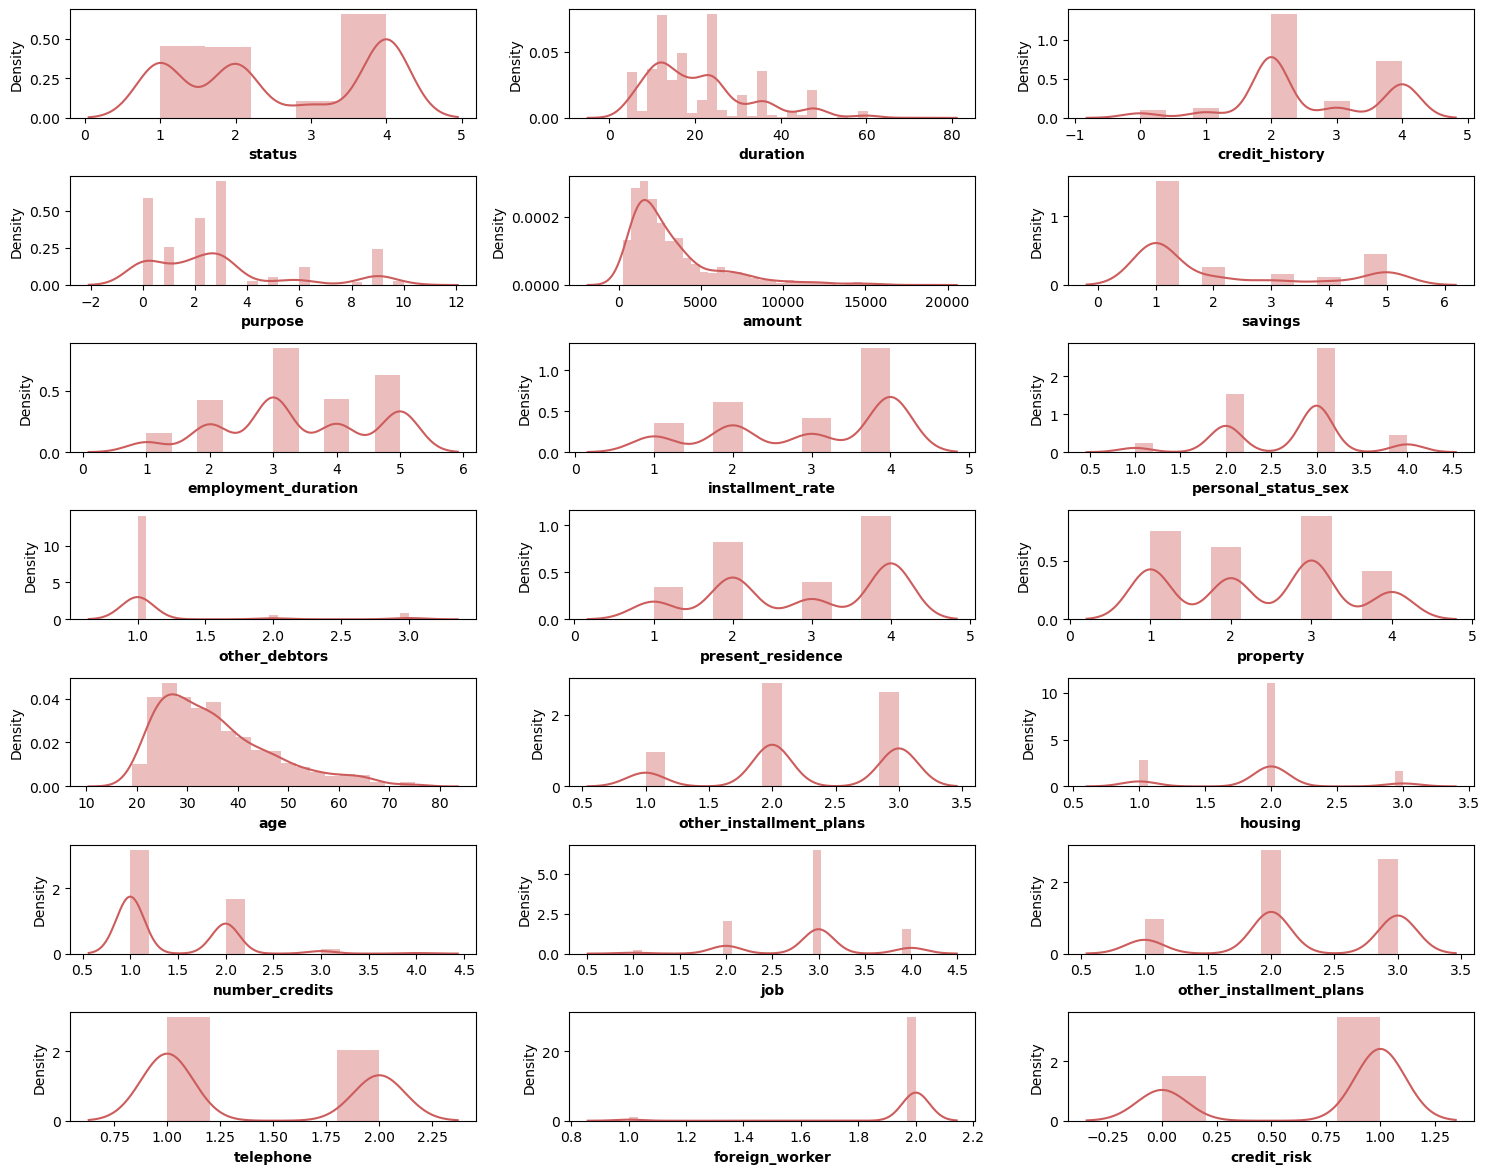

In [44]:
# feature distribution
plt.figure(figsize=(15, 100))
for i, col in enumerate(df.columns):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

> **Insights: Data distribution**
> * Continuous and chi-distributed data columns -> "duration", "amount" and "age"
> * most of data columns are multi-model and categorical
> * we can drop "foreign_worker" and "other_debtors" data column safely as most of the data belongs to one category only

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

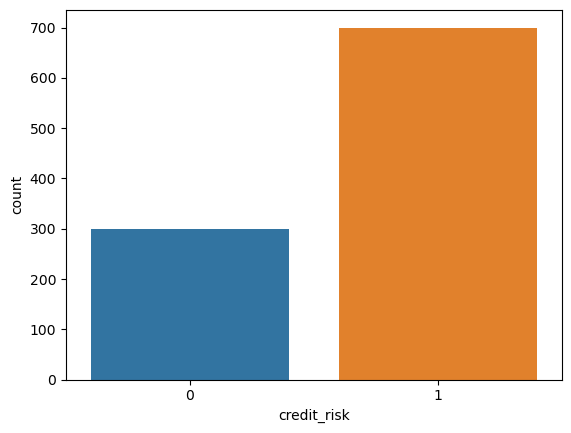

In [46]:
sns.countplot(df['credit_risk'])

- As expected there are way more people with good credit compare to bad credit risk
- The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

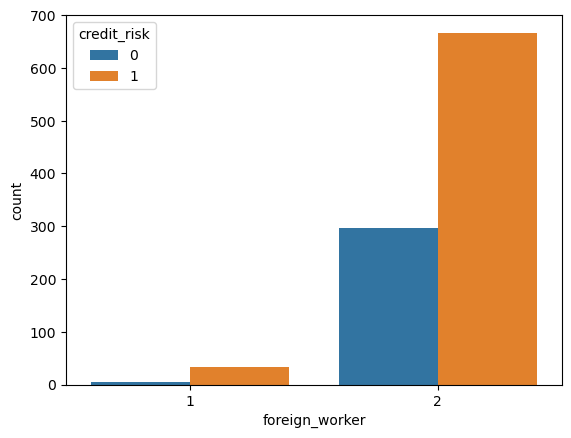

In [48]:
sns.countplot(df['foreign_worker'],hue=df['credit_risk'])

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

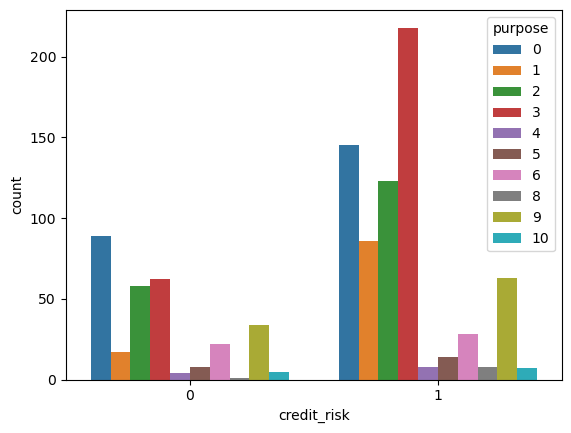

In [50]:
sns.countplot(df['credit_risk'],hue=df['purpose'])

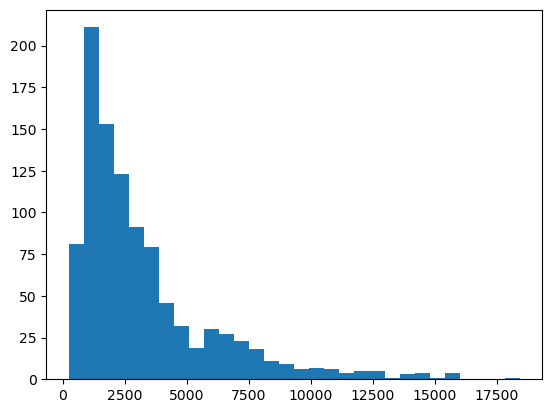

In [51]:
plt.hist(df['amount'],bins=30);

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

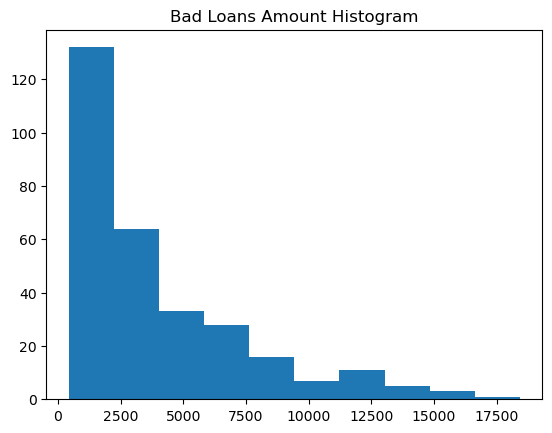

In [53]:
plt.hist(df[df['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')

- The badloans is right skewed and with maximum bad loans under 7500
- Highest bad loan could be for the business (can be checked quickly)

<AxesSubplot:xlabel='amount', ylabel='Density'>

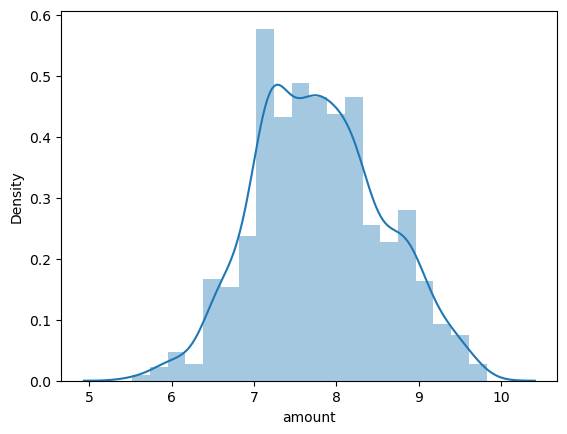

In [54]:
log_amount = np.log(df['amount'])
sns.distplot(log_amount,bins=20)

### 5. Conclusions
- age can be converted to ordinal data, for simplicity went with log transformation
- further improvement --> create data preparation and transformation pipeline
- The data is organized where the last 200 rows has credit risk as 0.Hence it is important to shuffle the dataset